Path found:  ['S', 'B', 'G']
Total cost:  5


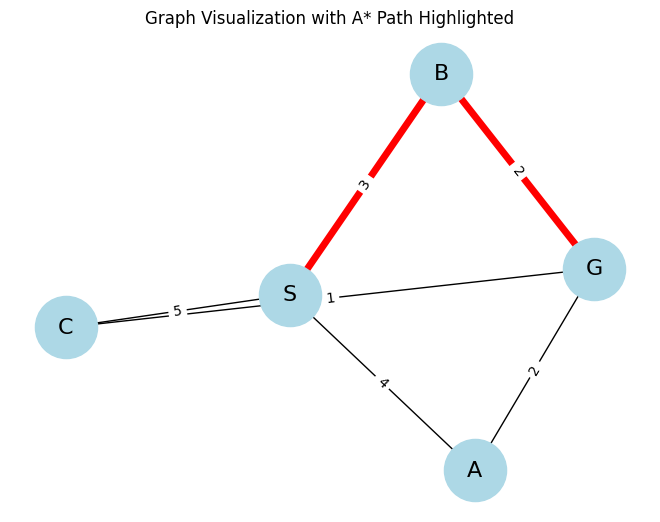

In [18]:
import matplotlib.pyplot as plt
import networkx as nx

Graph_nodes = {
    'S': [('A', 4), ('B', 3), ('C', 5)],
    'A': [('S', 4), ('G', 2)],
    'B': [('S', 3), ('G', 2)],
    'C': [('S', 5), ('G', 1)],
    'G': [('A', 2), ('B', 2), ('C', 1)]
}

def get_neighbors(v):
    return Graph_nodes.get(v, None)

def h(n):
    H_dist = {
        'S': 3,
        'A': 0,
        'B': 2,
        'C': 1,
        'G': 0
    }
    return H_dist.get(n, float('inf'))               #  If the node is not found, it returns infinity (float('inf'))

def sma_star(start_node, stop_node, memory_limit):
    open_set = {start_node}
    closed_set = set()
    g = {start_node: 0}                              # g: A dictionary that stores the cost to reach each node from the start node, initialized with the starting node having a cost of 0.
    parents = {start_node: (None, 0)}                # parents: A dictionary that keeps track of each node's parent and the cost to reach it, initialized with the starting node having no parent.Main Loop

    while open_set:
        # Prune the open set if it exceeds the memory limit
        if len(open_set) > memory_limit:
            # Remove nodes with the highest f-value
            node_to_remove = max(open_set, key=lambda x: g[x] + h(x))
            open_set.remove(node_to_remove)
            closed_set.add(node_to_remove)
            # Clean up closed set to ensure memory limit
            closed_set = {node for node in closed_set if len(open_set) + len(closed_set) <= memory_limit}

        # Choose the node with the lowest f-value in the open set
        if not open_set:                        # If the open_set is empty, the loop breaks.
            break
        
        current_node = min(open_set, key=lambda x: g[x] + h(x))

        if current_node == stop_node:
            path = []
            total_cost = g[current_node]

            while parents[current_node][0] is not None:
                path.append(current_node)
                current_node = parents[current_node][0]
            path.append(start_node)
            path.reverse()
            return path, total_cost

        open_set.remove(current_node)
        closed_set.add(current_node)

        for (neighbor, weight) in get_neighbors(current_node):
            new_g = g[current_node] + weight
            if neighbor not in g or new_g < g[neighbor]:
                if neighbor in closed_set:
                    closed_set.remove(neighbor)
                g[neighbor] = new_g
                parents[neighbor] = (current_node, new_g)
                if neighbor not in open_set:
                    open_set.add(neighbor)

    return None

# Set a memory limit for the algorithm
memory_limit = 3
result = sma_star('S', 'G', memory_limit)

if result:
    path, cost = result
    print("Path found: ", path)
    print("Total cost: ", cost)
else:
    print("No path found")


def draw_graph(path):
    G = nx.Graph()
    for node, edges in Graph_nodes.items():
        for neighbor, weight in edges:
            G.add_edge(node, neighbor, weight = weight)
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000, font_size=16)
    
    if path:
        path_edges = list(zip(path, path[1:]))
        nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=5)

    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

    plt.title("Graph Visualization with SMA* Path Highlighted")
    plt.show()

draw_graph(path)        
    